# Feature Scaling

<hr>

## Goal of Project
- A sport magazine is writing an article on soccer players
- They have special interest in left-footed players
- Determine whether playing style can predict if player is left-footed

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
# read the data
data = pd.read_parquet('./data/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
data = data[:2000]

In [4]:
data.columns

Index(['player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
len(data)

2000

In [6]:
# check for null values
data.isna().sum()

player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating          3
potential               3
preferred_foot          3
attacking_work_rate    43
defensive_work_rate     3
crossing                3
finishing               3
heading_accuracy        3
short_passing           3
volleys                28
dribbling               3
curve                  28
free_kick_accuracy      3
long_passing            3
ball_control            3
acceleration            3
sprint_speed            3
agility                28
reactions               3
balance                28
shot_power              3
jumping                28
stamina                 3
strength                3
long_shots              3
aggression              3
interceptions           3
positioning             3
vision                 28
penalties               3
marking                 3
standing_tackle         3
sliding_tackle         28
gk_diving               3
gk_handling             3
gk_kicking  

In [7]:
data = data.dropna()
len(data)

1957

In [8]:
data.dtypes.sort_values()

player_fifa_api_id       int64
player_api_id            int64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing_tackle        float64
sliding_tackle         float64
gk_diving              float64
gk_handling            float64
gk_kicking             float64
balance                float64
reactions              float64
agility                float64
sprint_speed           float64
overall_rating         float64
potential              float64
crossing               float64
finishing              float64
gk_positioning         float64
short_passing          float64
heading_accuracy       float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_pas

In [9]:
X = data.select_dtypes(include='number').drop(['player_fifa_api_id','player_api_id'],axis=1)
y = data['preferred_foot']

In [10]:
X.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
# transform the y

y = np.array([1 if value == 'right' else 0 for value in y])

In [12]:
# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

## Normalize

In [13]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [14]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,...,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,0.545428,0.531958,0.636725,0.580062,0.588554,0.676148,0.585446,0.604646,0.568375,0.514867,...,0.629271,0.552253,0.500657,0.550347,0.504110,0.146155,0.173747,0.191358,0.176568,0.165331
std,0.192682,0.179028,0.211628,0.237989,0.176451,0.193594,0.224039,0.190131,0.240461,0.214197,...,0.215588,0.210052,0.280319,0.276616,0.280053,0.182993,0.182362,0.225805,0.184999,0.181799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.405405,0.405405,0.500000,0.391892,0.500000,0.614286,0.394737,0.505882,0.394366,0.363636,...,0.500000,0.405797,0.185714,0.266667,0.191781,0.066667,0.071429,0.060976,0.085714,0.076923
50%,0.567568,0.540541,0.666667,0.608108,0.625000,0.700000,0.631579,0.635294,0.605634,0.519481,...,0.647059,0.565217,0.571429,0.640000,0.561644,0.106667,0.128571,0.109756,0.128571,0.115385
75%,0.675676,0.648649,0.794872,0.783784,0.700000,0.800000,0.776316,0.729412,0.760563,0.675325,...,0.779412,0.710145,0.757143,0.800000,0.739726,0.146667,0.171429,0.146341,0.171429,0.153846
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Standardize

In [15]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [16]:
pd.DataFrame(X_train_stand).describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,...,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03,1.565000e+03
mean,9.029341e-16,-9.284728e-16,9.080418e-18,-5.448251e-17,1.032898e-16,-1.770682e-16,-1.112351e-16,-4.540209e-17,-1.498269e-16,1.475568e-17,...,3.405157e-17,-1.328011e-16,-6.810314e-17,1.816084e-17,1.407465e-16,-8.172377e-17,9.080418e-18,7.037324e-17,-4.086188e-17,3.178146e-17
std,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,...,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000320e+00
min,-2.831620e+00,-2.972310e+00,-3.009662e+00,-2.438132e+00,-3.336575e+00,-3.493718e+00,-2.613986e+00,-3.181174e+00,-2.364449e+00,-2.404474e+00,...,-2.919791e+00,-2.629966e+00,-1.786597e+00,-1.990210e+00,-1.800626e+00,-7.989514e-01,-9.530625e-01,-8.477198e-01,-9.547332e-01,-9.097113e-01
25%,-7.269346e-01,-7.071094e-01,-6.462691e-01,-7.909220e-01,-5.020236e-01,-3.196475e-01,-8.515077e-01,-5.196159e-01,-7.238797e-01,-7.062591e-01,...,-5.998114e-01,-6.974582e-01,-1.123875e+00,-1.025869e+00,-1.115605e+00,-4.345215e-01,-5.612524e-01,-5.775969e-01,-4.912609e-01,-4.864535e-01
50%,1.149396e-01,4.795761e-02,1.415287e-01,1.178834e-01,2.066144e-01,1.232461e-01,2.059790e-01,1.612478e-01,1.549967e-01,2.154741e-02,...,8.253565e-02,6.174147e-02,2.525477e-01,3.242099e-01,2.055063e-01,-2.158636e-01,-2.478043e-01,-3.614986e-01,-2.595248e-01,-2.748246e-01
75%,6.761890e-01,6.520112e-01,7.475270e-01,8.562877e-01,6.317971e-01,6.399553e-01,8.522210e-01,6.564215e-01,7.995062e-01,7.493540e-01,...,6.966480e-01,7.519230e-01,9.152696e-01,9.028150e-01,8.415971e-01,2.794350e-03,-1.271818e-02,-1.994249e-01,-2.778860e-02,-6.319568e-02
max,2.359937e+00,2.615185e+00,1.717124e+00,1.765093e+00,2.332528e+00,1.673374e+00,1.850958e+00,2.080046e+00,1.795566e+00,2.265618e+00,...,1.720169e+00,2.132286e+00,1.781906e+00,1.626071e+00,1.771268e+00,4.667497e+00,4.532279e+00,3.582295e+00,4.452444e+00,4.592640e+00


In [17]:
pd.DataFrame(X_train_stand).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,...,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00,1565.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.83,-2.97,-3.01,-2.44,-3.34,-3.49,-2.61,-3.18,-2.36,-2.40,...,-2.92,-2.63,-1.79,-1.99,-1.80,-0.80,-0.95,-0.85,-0.95,-0.91
25%,-0.73,-0.71,-0.65,-0.79,-0.50,-0.32,-0.85,-0.52,-0.72,-0.71,...,-0.60,-0.70,-1.12,-1.03,-1.12,-0.43,-0.56,-0.58,-0.49,-0.49
50%,0.11,0.05,0.14,0.12,0.21,0.12,0.21,0.16,0.15,0.02,...,0.08,0.06,0.25,0.32,0.21,-0.22,-0.25,-0.36,-0.26,-0.27
75%,0.68,0.65,0.75,0.86,0.63,0.64,0.85,0.66,0.80,0.75,...,0.70,0.75,0.92,0.90,0.84,0.00,-0.01,-0.20,-0.03,-0.06
max,2.36,2.62,1.72,1.77,2.33,1.67,1.85,2.08,1.80,2.27,...,1.72,2.13,1.78,1.63,1.77,4.67,4.53,3.58,4.45,4.59


## Machine Learning Model

In [18]:
score = []

X_trains = [X_train,X_train_norm,X_train_stand]
X_tests = [X_test,X_test_norm,X_test_stand]

for train, test in zip(X_trains,X_tests):
    svc = SVC()
    
    svc.fit(train,y_train)
    y_pred = svc.predict(test)
    
    score.append(accuracy_score(y_test,y_pred))
    
df_var = pd.DataFrame({'Accuracy score': score},index=['Original','Normalized','Standardized'])
df_var

,Accuracy score
Original,0.862245
Normalized,0.900510
Standardized,0.951531


### Important Features

In [19]:
svc = SVC()
svc.fit(X_train_stand,y_train)

SVC()

In [20]:
perm_importance = permutation_importance(svc,X_test_stand,y_test)

In [21]:
perm_importance.importances_mean

array([ 0.00510204,  0.02397959,  0.02653061,  0.00408163,  0.01836735,
        0.00612245,  0.06887755,  0.00306122,  0.04285714,  0.01479592,
        0.08010204,  0.01836735,  0.00612245, -0.0005102 ,  0.0127551 ,
        0.00867347,  0.00357143,  0.01428571,  0.0127551 ,  0.01734694,
        0.05612245,  0.00306122,  0.02346939,  0.02857143,  0.03163265,
        0.03673469,  0.0122449 ,  0.00561224,  0.03520408,  0.00357143,
        0.00765306,  0.00765306,  0.00102041,  0.00816327,  0.00969388])

<AxesSubplot:>

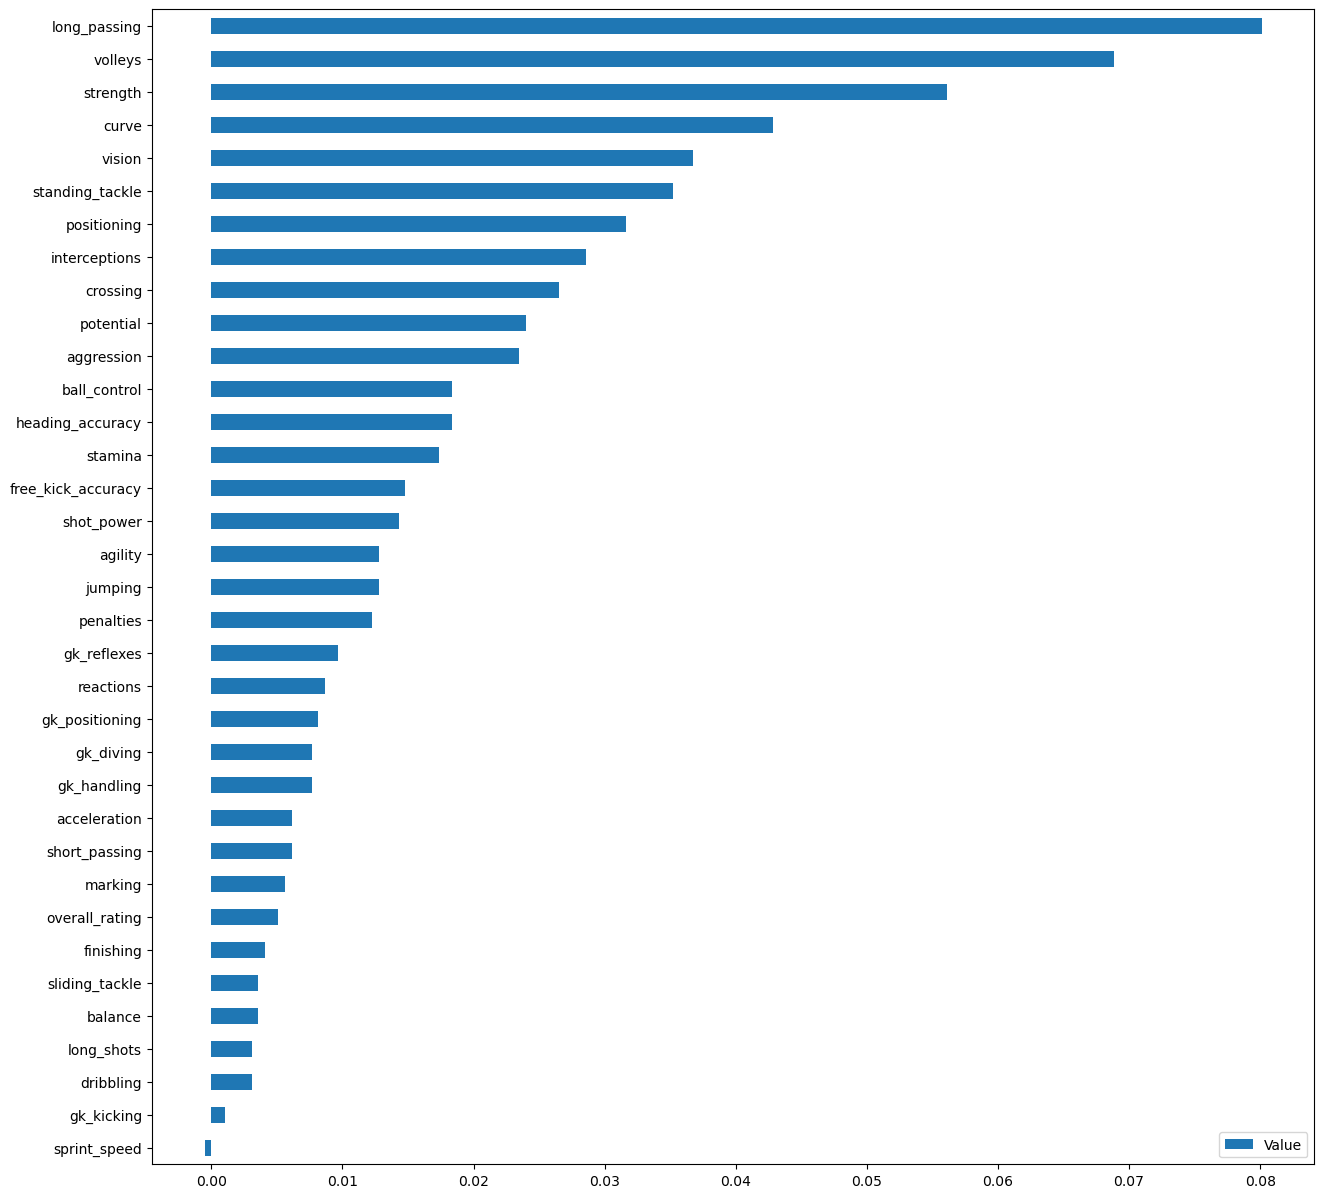

In [22]:
sort_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sort_idx],X_test.columns[sort_idx],columns=['Value'])
df.plot.barh(figsize=(15,15))